<center><h1> Case Study 3</h1></center>
<center><h3> Week 3 (out of 5)</h3></center>

**Author(s):**
1. Robin Fu (robin.fu@emory.edu)
 
**Data Source**: http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html
 
**Book**: [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) by Jeffrey Wooldridge

<center><h4> PART A</h4></center>

**Background**: So far we have learned to partition (split) the data into a _training_ and a _test_ data set using the `train_test_split` function from the `sklearn.model_selection` submodule in Python. However, this spliting function assumes _random sampling_ aka _cross-sectional_ data, see, i.e., Section 1.3, pages 5-6, of [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) by Jeffrey Wooldridge. 

1. [20 points] However, you have been given data sets `hprice3` and `rental` from the data source above. After identifying the correct data structure (read Section 1.3, pages 5-11, of [Introductory Econometrics: A Modern Approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) by Jeffrey Wooldridge), proceed to construct a _training_ (75%) as well as a _test_ (25%) data set for each of them that preserves the original data structure in each of the newly created splits. Please set the seed to be equal to 42 for replicability purposes. Furthermore, for the purpose of this question you can select _any_ variable as your outcome variable and subset of variables as your set of features. **Hint**: In one case you can use the `GroupShuffleSplit` function from `sklearn`, in the other you can apply the `train_test_split` functions to a correctly pre-partitioned data set, and then just join the split accordingly.

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import patsy

#Pooled Cross Sectional Data
hprice3 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/hprice3.dta')
hprice3['lcbd'] = np.log(hprice3.cbd) #new column lcbd, log of cbd
#Something like pooled cross sectional, not competely right

f = 'lprice ~ -1 + lland + larea + lcbd + nbh + rooms + y81 + linst + ldist + baths + age + agesq'
y, X = patsy.dmatrices(f, data = hprice3, return_type = 'dataframe')
X0 = X[X['y81'] == 0]
y0 = y[X['y81'] == 0]
X1 = X[X['y81'] == 1]
y1 = y[X['y81'] == 1]

X0_train, X0_test, y0_train, y0_test = ms.train_test_split(X0, y0, train_size = 0.75, random_state = 42)
X1_train, X1_test, y1_train, y1_test = ms.train_test_split(X1, y1, train_size = 0.75, random_state = 42)

In [2]:
X_train = pd.concat([X0_train, X1_train])
y_train = pd.concat([y0_train, y1_train])
X_test = pd.concat([X0_test, X1_test])
y_test = pd.concat([y0_test, y1_test])

In [3]:
X_train

,lland,larea,lcbd,nbh,rooms,y81,linst,ldist,baths,age,agesq
144,10.691850,7.829630,9.903487,2.0,6.0,0.0,9.9035,10.165850,3.0,0.0,0.0
90,10.681890,7.935945,9.546813,1.0,7.0,0.0,9.6803,9.655026,3.0,1.0,1.0
141,10.716770,7.491087,10.085809,2.0,7.0,0.0,10.0430,10.275050,3.0,4.0,16.0
147,10.853020,6.866933,10.165852,3.0,5.0,0.0,10.1660,10.364070,1.0,15.0,225.0
2,8.517193,7.042286,8.294049,4.0,6.0,0.0,6.9078,9.350102,1.0,58.0,3364.0
...,...,...,...,...,...,...,...,...,...,...,...
250,10.691830,7.753623,10.085809,6.0,6.0,1.0,10.1270,10.196160,2.0,0.0,0.0
285,10.749310,7.946618,10.043249,0.0,7.0,1.0,10.0430,10.250620,3.0,0.0,0.0
193,9.443989,7.301148,8.294049,4.0,6.0,1.0,8.2940,9.384294,1.0,31.0,961.0
271,10.682190,7.921535,10.239960,5.0,7.0,1.0,10.2400,10.376610,3.0,3.0,9.0


In [5]:
#City Level Panel Data
rental = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/rental.dta') 

f = 'lrent ~ -1 + lenroll + lpop + ltothsg + lrnthsg + lavginc + y90'
y, X = patsy.dmatrices(f, data = rental, return_type = 'dataframe')

gss = ms.GroupShuffleSplit(n_splits = 1, train_size = 0.75, random_state = 42)

for train_index, test_index in gss.split(X, y, rental['city']):
    X_train = X.iloc[train_index,:]
    y_train = y.iloc[train_index,:]
    X_test = X.iloc[test_index,:]
    y_test = y.iloc[test_index,:]

In [6]:
X_train

,lenroll,lpop,ltothsg,lrnthsg,lavginc,y90
2,10.019580,11.57818,10.526130,9.587406,9.895506,0.0
3,10.301220,11.86263,10.924860,10.199700,10.369890,1.0
4,9.379830,10.50802,9.509110,8.857373,9.346182,0.0
5,9.236495,10.64778,9.734714,9.165030,9.961851,1.0
6,9.534234,10.50890,9.549737,8.974112,9.594378,0.0
...,...,...,...,...,...,...
121,9.381769,10.16119,9.168267,8.581857,9.799349,1.0
124,9.110631,10.78616,9.802838,9.014812,9.507329,0.0
125,9.206432,10.83964,9.901986,9.217614,9.996386,1.0
126,10.531430,12.04717,11.104220,10.437290,9.711721,0.0


<center><h4> PART B</h4></center>

Loading in data set and pre-processing design matrices for SVC implementation.

In [7]:
#Load in data set
df = pd.read_csv('https://app.quadstat.net/system/files/datasets/dataset-63314.csv')

#Map string sto numerical values
df['default']  = df['default'].map({'Yes': 1, 'No': 0})
df['student'] = df['student'].map({'Yes': 1, 'No': 0})

#Create functions and design matrices
y, X = patsy.dmatrices('default ~ -1 + balance + income', data=df, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Standardize X
from sklearn import preprocessing
X_train_scaled = pd.DataFrame(preprocessing.scale(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(preprocessing.scale(X_test), columns = X_train.columns)

**Background**: This part uses the same [data set](https://app.quadstat.net/system/files/datasets/dataset-63314.csv) as in the `SVM_py.ipynb` notebook

2. [20 points] Modify this code in the lecture notes:

```python
svcPoly = SVC(kernel='poly',degree=3)

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svcPoly, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

print(clf.best_score_ )
print(clf.best_estimator_.C  )

# Prediction performance on test set is not better that on train set
clf.score(X_test_scaled, y_test)
```

so it allows for a grid search over the degree of the polynomial, i.e., 1, 2, 3, 4, 5, and 6 as well.

In [8]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

degrees = [1,2,3,4,5,6]

Cs = np.logspace(-6, 0, 10)
clf = GridSearchCV(estimator=SVC(kernel = 'poly'), param_grid=[dict(C=Cs), dict(degree = degrees)]
                   ,n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

print('Best Score:',clf.best_score_ )
print('Best Degree:',clf.best_estimator_.degree)
print('Best C:',clf.best_estimator_.C  )

# Prediction performance on test set is not better that on train set
clf.score(X_test_scaled, y_test)

Best Score: 0.9725333333333334
Best Degree: 5
Best C: 1.0


0.9724

3. [20 points] Modify this code in the lecture notes:

```python
svcRadial = SVC(kernel='rbf',gamma=.01)

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svcRadial, param_grid=dict(C=Cs),n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

print(clf.best_score_ )
print(clf.best_estimator_.C  )

# Prediction performance on test set is not better that on train set
clf.score(X_test_scaled, y_test)
```
so it allows for a grid search over the gamma parameter. **Hint**: Read [RBF SVM Parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) to understand the importance of the gamma parameter.

In [9]:
gammas = np.logspace(-6, 0, 15)

Cs = np.logspace(-6, 0, 10)
clf = GridSearchCV(estimator=SVC(kernel = 'rbf'), param_grid=[dict(C = Cs),dict(gamma = gammas)]
                   ,n_jobs=-1)
clf.fit(X_train_scaled, y_train.values.ravel())

print('Best Score:',clf.best_score_ )
print('Best Gamma:',clf.best_estimator_.gamma)
print('Best C:',clf.best_estimator_.C  )

# Prediction performance on test set is not better that on train set
clf.score(X_test_scaled, y_test)

Best Score: 0.9724
Best Gamma: 1.0
Best C: 1.0


0.9728

4. Read this [post](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/) and modify the code in it to create 2 _multi-figures_ plots using the `rbf` kernel above as follows:
    1. [20 points] Create a 2 x 2 [multi-figure plot](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html) keeping `C` constant and equal to the value stored in `clf.best_estimator_.C` in question 3 above, but letting `gamma` equal to 0.01 (plot position [1,1]), to 1.0 (plot position [1,2]), to 10.0 (plot position [2,1]), and equal to 100.0 (plot position [2,2]).
    2. [20 points] reate a 2 x 2 [multi-figure plot](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html) keeping `gamma` constant and equal to the value stored in `clf.best_estimator_.gamma` in question 3 above (after you modify it of course), but letting `C` equal to 1 (plot position [1,1]), to 10 (plot position [1,2]), to 1000 (plot position [2,1]), and equal to 10000.0 (plot position [2,2]).

#### Part A

In [11]:
#Function to visualize decision resions:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightcoral', 'lightblue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl].iloc[:,0], y=X[y == cl].iloc[:,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


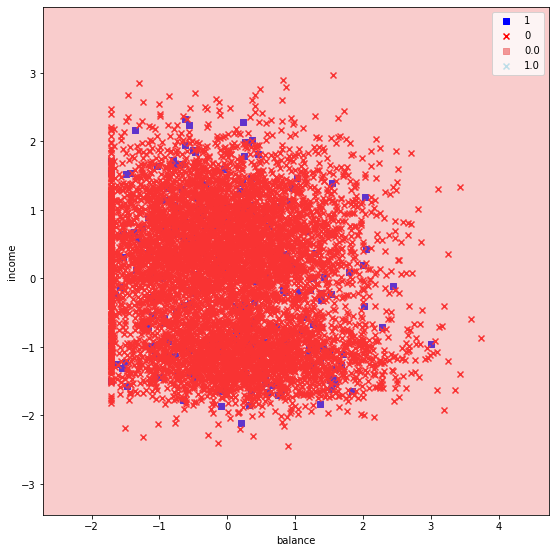

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


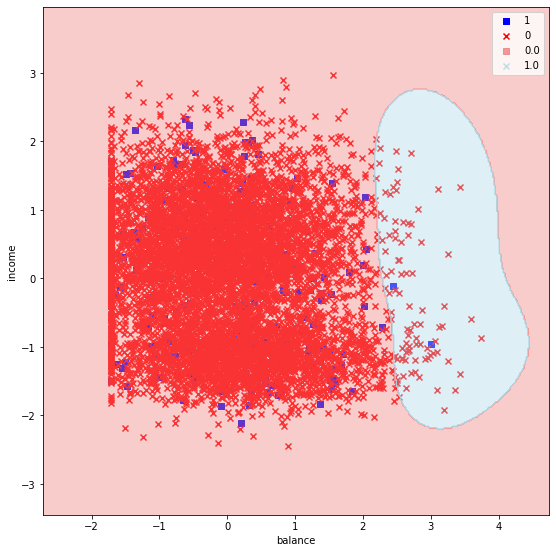

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


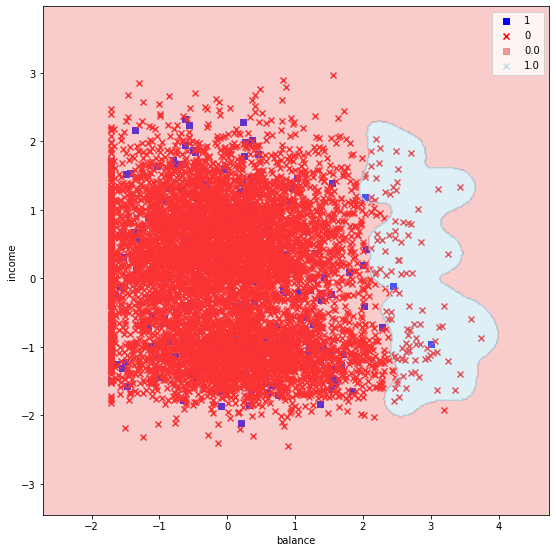

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


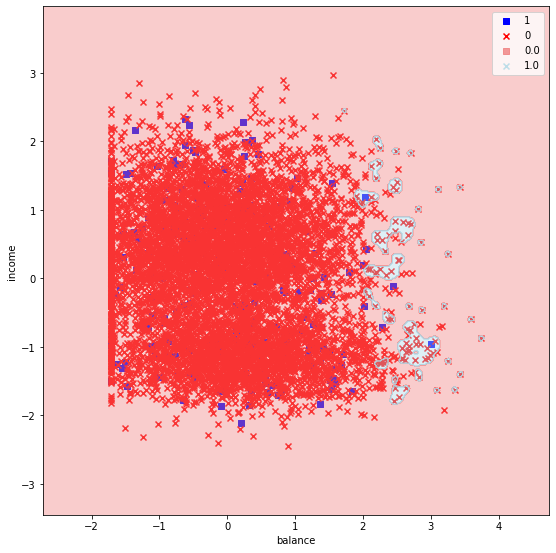

In [16]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

clf1 = SVC()
C = clf.best_estimator_.C

#plt.rcParams["figure.figsize"] = (15,15)
#Subplot 1
plt.subplot(2,2,1)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = np.array(['b']), marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = np.array(['r']), marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


gamma1 = 0.01
svm1 = SVC(kernel = 'rbf', random_state = 42, C = C, gamma = gamma1)
svm1.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm1)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Subplot 2
plt.subplot(2,2,2)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = np.array(['b']), marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = np.array(['r']), marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


gamma2 = 1.0
svm2 = SVC(kernel = 'rbf', random_state = 42, C = C, gamma = gamma2)
svm2.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm2)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Subplot 3
plt.subplot(2,2,3)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = np.array(['b']), marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = np.array(['r']), marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


gamma3 = 10.0
svm3 = SVC(kernel = 'rbf', random_state = 42, C = C, gamma = gamma3)
svm3.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm3)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Subplot 4
plt.subplot(2,2,4)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = np.array(['b']), marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = np.array(['r']), marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


gamma4 = 100.0
svm4 = SVC(kernel = 'rbf', random_state = 42, C = C, gamma = gamma4)
svm4.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm4)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Part B

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


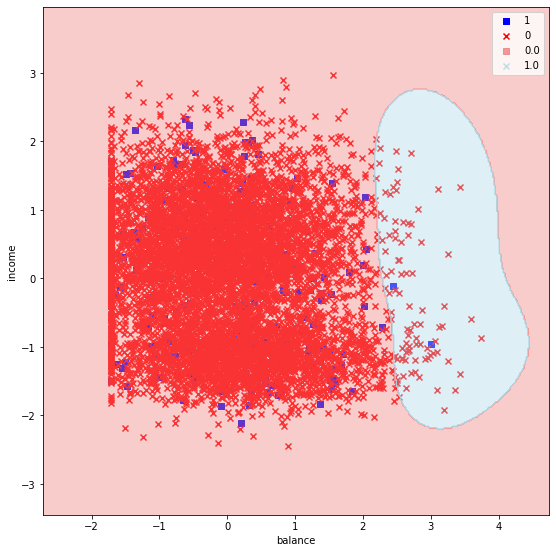

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


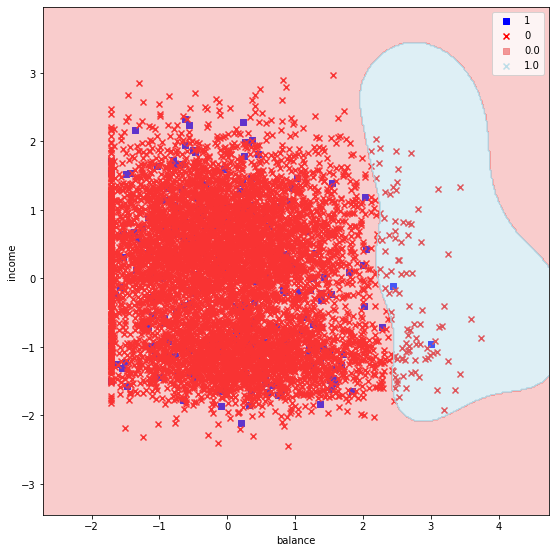

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


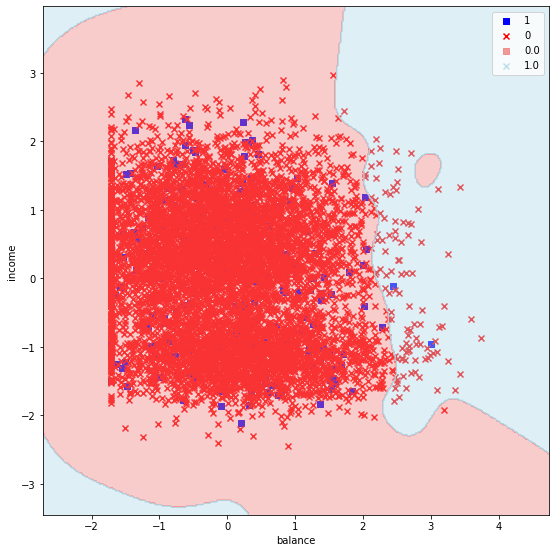

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


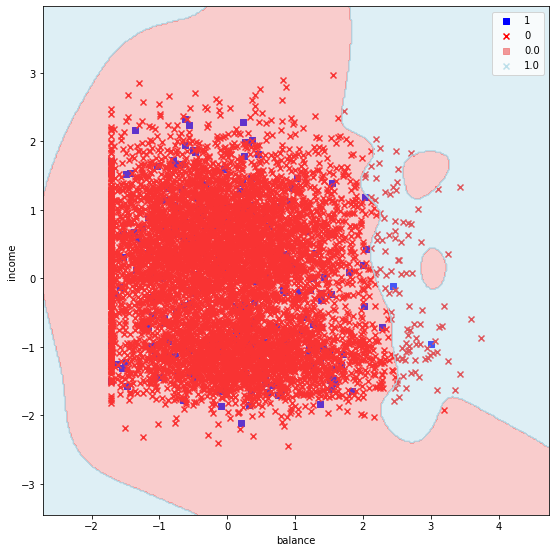

In [14]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

clf1 = SVC()
gamma = clf.best_estimator_.gamma

#Subplot 1
plt.subplot(2,2,1)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1

plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = 'b', marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = 'r', marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


C1 = 1.0
svm1 = SVC(kernel = 'rbf', random_state = 42, C = C1, gamma = gamma)
svm1.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm1)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Subplot 2
plt.subplot(2,2,2)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1

plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = 'b', marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = 'r', marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


C2 = 10.0
svm2 = SVC(kernel = 'rbf', random_state = 42, C = C2, gamma = gamma)
svm2.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm2)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Subplot 3
plt.subplot(2,2,3)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1

plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = 'b', marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = 'r', marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


C3 = 1000.0
svm3 = SVC(kernel = 'rbf', random_state = 42, C = C3, gamma = gamma)
svm3.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm3)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#Subplot 4
plt.subplot(2,2,4)
boolsrs = y_train.sort_index(ignore_index = True)['default'] == 1

plt.scatter(X_train_scaled['balance'][boolsrs],
            X_train_scaled['income'][boolsrs],
            c = 'b', marker = 's', label = '1')
plt.scatter(X_train_scaled['balance'][np.logical_not(boolsrs)],
            X_train_scaled['income'][np.logical_not(boolsrs)],
            c = 'r', marker = 'x', label = '0')
plt.xlabel('balance')
plt.ylabel('income')


C4 = 10000.0
svm4 = SVC(kernel = 'rbf', random_state = 42, C = C4, gamma = gamma)
svm4.fit(X_train_scaled, y_train.values.ravel())
plot_decision_regions(X_train_scaled, y_train, classifier=svm4)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()